X Ray flouroscence


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv('Sc20b165.csv')
data.tail()

,Channel,Noise Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Copper Channel,Copper Data,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Tin Channel,Tin Data,Unnamed: 17,Unnamed: 18,Unnamed: 19,Gold Channel,Gold Data
8187,8187,0,NaN,NaN,NaN,8187,0,NaN,NaN,NaN,...,NaN,NaN,NaN,8187,0,NaN,NaN,NaN,8187,0
8188,8188,0,NaN,NaN,NaN,8188,0,NaN,NaN,NaN,...,NaN,NaN,NaN,8188,0,NaN,NaN,NaN,8188,0
8189,8189,0,NaN,NaN,NaN,8189,0,NaN,NaN,NaN,...,NaN,NaN,NaN,8189,0,NaN,NaN,NaN,8189,0
8190,8190,0,NaN,NaN,NaN,8190,0,NaN,NaN,NaN,...,NaN,NaN,NaN,8190,0,NaN,NaN,NaN,8190,0
8191,8191,0,NaN,NaN,NaN,8191,0,NaN,NaN,NaN,...,NaN,NaN,NaN,8191,0,NaN,NaN,NaN,8191,0


In [101]:
data = data.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 7','Unnamed: 8','Unnamed: 9',
                             'Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 17','Unnamed: 18',
                             'Unnamed: 19','Copper Channel', 'Solder Channel','Tin Channel','Gold Channel'])

In [102]:
col = data.columns

data.shape

(8192, 6)

In [103]:
for i in range(6):
    data[col[i]] = data[col[i]][:1700]

In [104]:
# data = data.dropna()

In [105]:
data.shape

(8192, 6)

In [106]:
data.head(10)

,Channel,Noise Data,Copper Data,Solder Data,Tin Data,Gold Data
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0
5,5.0,0.0,0.0,0.0,0.0,0.0
6,6.0,0.0,0.0,0.0,0.0,0.0
7,7.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0
9,9.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# data['Noise Channel'][:2400]   x[i-9],x[i-8],x[i-7],x[i-6],
index = data.columns[1:]
index

Index(['Noise Data', 'Copper Data', 'Solder Data', 'Tin Data', 'Gold Data'], dtype='object')

In [108]:
# defining the filter for smoothning the response
def mavgf(x):
    y = []
    x = x.to_list()
    y = x[:15]
    for i in range(15,len(x)):
        y.append(( x[i-14]+x[i-13]+x[i-12]+x[i-11]+x[i-10]+x[i-9]+x[i-8]+x[i-7]+x[i-6]+x[i-5]+x[i-4]+x[i-3]+x[i-2]+x[i-1])/15)
    return np.array(y)     

In [109]:
# k = mavgf(data['Copper Data'])
# k.shape

In [110]:
# Applying the moving average filter to the data columns
for i in index:
    data[i] = mavgf(data[i])

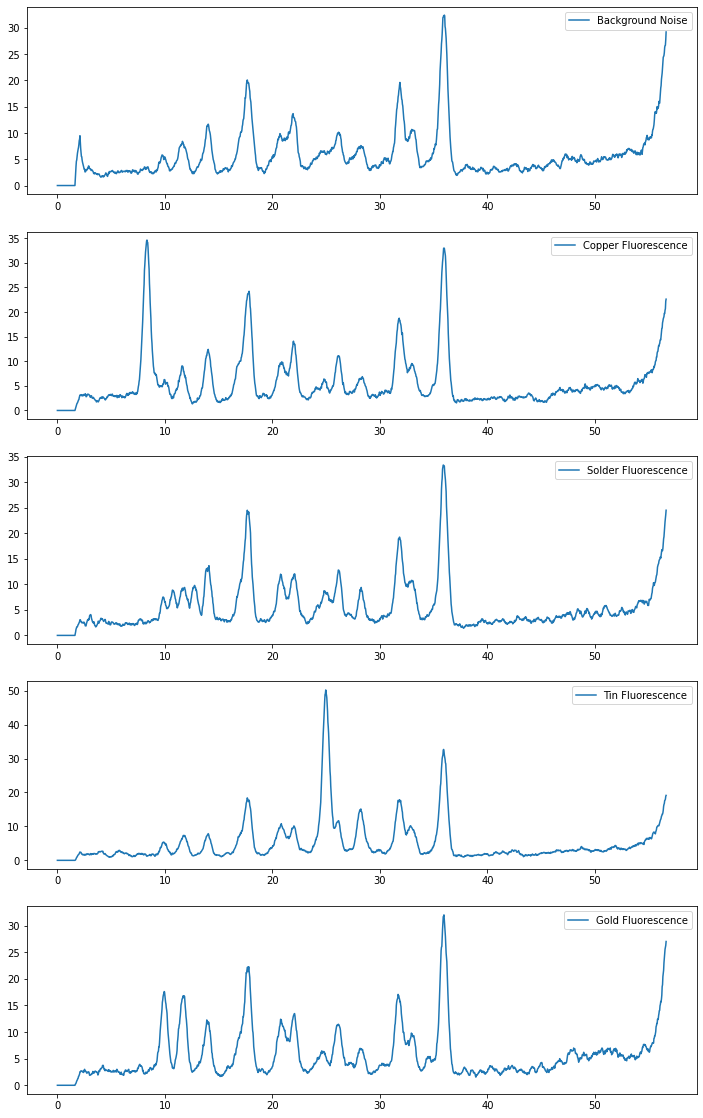

In [111]:
#Raw plots with the Background noise
fig, ax = plt.subplots(5,1, figsize = (12,20))
ax[0].plot(data['Channel']/30,data['Noise Data'],label ='Background Noise')
ax[0].legend()
ax[1].plot(data['Channel']/30,data['Copper Data'], label = 'Copper Fluorescence')
ax[1].legend()
ax[2].plot(data['Channel']/30,data['Solder Data'], label = 'Solder Fluorescence')
ax[2].legend()
ax[3].plot(data['Channel']/30,data['Tin Data'], label = 'Tin Fluorescence')
ax[3].legend()
ax[4].plot(data['Channel']/30,data['Gold Data'], label = 'Gold Fluorescence')
ax[4].legend()
plt.show()

In [112]:
# Modified Columns
data['Copper_data_mod'] = data['Copper Data']- data['Noise Data']
data['Solder_data_mod'] = data['Solder Data']- data['Noise Data']
data['Tin_data_mod'] = data['Tin Data']- data['Noise Data']
data['Gold_data_mod'] = data['Gold Data']- data['Noise Data']
data.head()

,Channel,Noise Data,Copper Data,Solder Data,Tin Data,Gold Data,Copper_data_mod,Solder_data_mod,Tin_data_mod,Gold_data_mod
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
#Replacing all the negative values with '0'
data[data<0] = 0

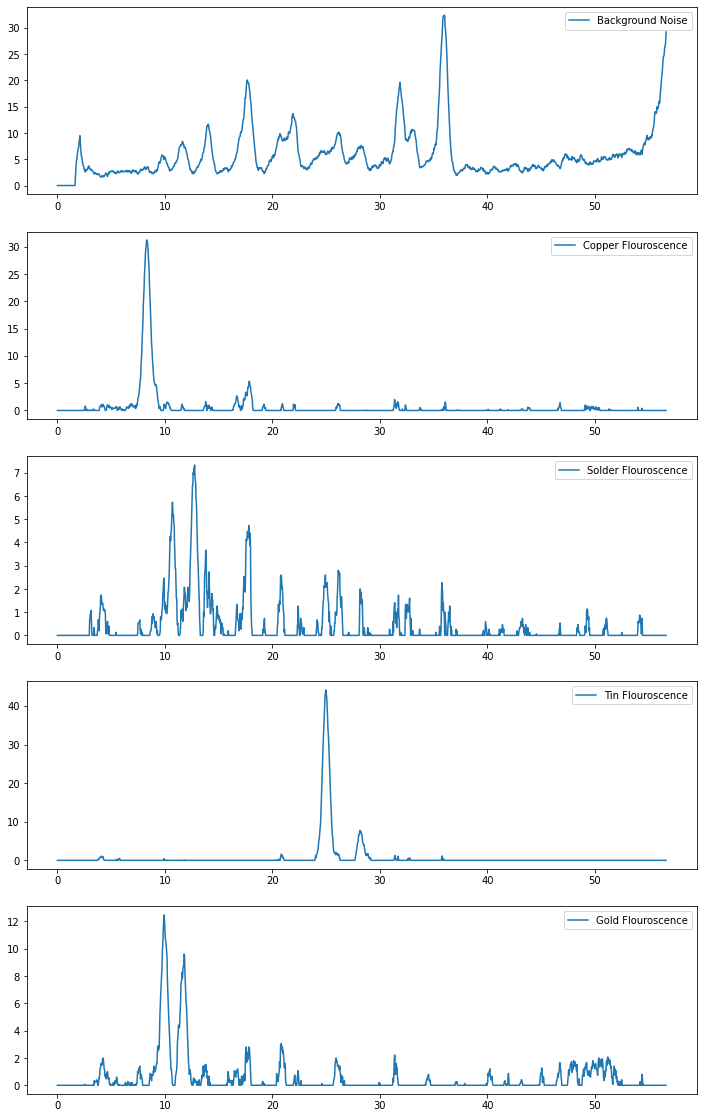

In [114]:
#Raw plots without the Background noise
fig, ax = plt.subplots(5,1, figsize = (12,20))
ax[0].plot(data['Channel']/30,data['Noise Data'],label ='Background Noise')
ax[0].legend()
ax[1].plot(data['Channel']/30,data['Copper_data_mod'], label = 'Copper Flouroscence')
ax[1].legend()
ax[2].plot(data['Channel']/30,data['Solder_data_mod'], label = 'Solder Flouroscence')
ax[2].legend()
ax[3].plot(data['Channel']/30,data['Tin_data_mod'], label = 'Tin Flouroscence')
ax[3].legend()
ax[4].plot(data['Channel']/30,data['Gold_data_mod'], label = 'Gold Flouroscence')
ax[4].legend()
plt.show()